In [1]:
!python --version

Python 3.7.10


In [5]:
!brew install portaudio

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
archey4                    libunwind                  python-tk@3.9
as-tree                    linux-pam                  qt-libiodbc
brook                      llvm@11                    qt-mariadb
cadence-workflow           lttng-ust                  qt-mysql
clusterctl                 mapcidr                    qt-percona-server
conftest                   marcli                     qt-postgresql
crackpkcs                  minisat                    qt-unixodbc
csvtk                      moto                       rosa-cli
djl-serving                multitime                  six
dory                       mx                         smu
dua-cli                    net-tools                  spaceship
enkits                     numactl                    systemd
epr                        obfs4proxy                 threemux
glibc                      orgalorg              

Pruned 1 symbolic links and 7 directories from /usr/local


In [6]:
!pip install pyaudio

  Using cached PyAudio-0.2.11.tar.gz (37 kB)
  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp37-cp37m-macosx_10_9_x86_64.whl size=23427 sha256=f9b98ed2301a70cea753bbbe859340ec873c102855ad763cbf73d43c0e81c5d4
  Stored in directory: /Users/jaeyoungshin/Library/Caches/pip/wheels/40/2e/4c/b71e7e96c861a46e6213bc6bb482b94dcf293a92c5e736c1ec
Successfully built pyaudio


In [8]:
!pip install numpy

  Using cached numpy-1.20.2-cp37-cp37m-macosx_10_9_x86_64.whl (16.0 MB)


In [10]:
!pip install scipy

  Using cached scipy-1.6.2-cp37-cp37m-macosx_10_9_x86_64.whl (30.7 MB)


In [3]:
# 입출력 장치 확인
import pyaudio

audio = pyaudio.PyAudio()

for index in range(audio.get_device_count()):
    desc = audio.get_device_info_by_index(index)
    print("DEVICE: {device}, INDEX: {index}, RATE: {rate} ".format(
        device=desc["name"], index=index, rate=int(desc["defaultSampleRate"])))

DEVICE: MacBook Pro 마이크, INDEX: 0, RATE: 48000 
DEVICE: MacBook Pro 스피커, INDEX: 1, RATE: 48000 
DEVICE: iShowU Audio Capture, INDEX: 2, RATE: 44100 
DEVICE: 통합 기기, INDEX: 3, RATE: 44100 
DEVICE: 다중 출력 기기, INDEX: 4, RATE: 44100 


In [1]:
"""
Measure the frequencies coming in through the microphone
Mashup of wire_full.py from pyaudio tests and spectrum.py from Chaco examples
"""

import pyaudio
import numpy as np
import scipy.signal

CHUNK = 1024*2
FORMAT = pyaudio.paInt16
WIDTH = 2
DTYPE = np.int16
MAX_INT = 32768.0
WAVE_OUTPUT_FILENAME = "noisereduce.wav"
CHANNELS = 1
RATE = 11025*1
RECORD_SECONDS = 20

j = np.complex(0,1)


p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK)

print("* recording")

# initialize filter variables
fir = np.zeros(CHUNK * 2)
fir[:(2*CHUNK)] = 1.
fir /= fir.sum()

fir_last = fir
avg_freq_buffer = np.zeros(CHUNK)
obj = -np.inf
t = 10

# initialize sample buffer
buffer = np.zeros(CHUNK * 2)

#for i in np.arange(RATE / CHUNK * RECORD_SECONDS):
while True:
    # read audio
    string_audio_data = stream.read(CHUNK)
    audio_data = np.frombuffer(string_audio_data, dtype=DTYPE)
    normalized_data = audio_data / MAX_INT
    freq_data = np.fft.fft(normalized_data)

    # synthesize audio
    buffer[CHUNK:] = np.random.randn(CHUNK)
    freq_buffer = np.fft.fft(buffer)
    freq_fir = np.fft.fft(fir)
    freq_synth = freq_fir * freq_buffer
    synth = np.real(np.fft.ifft(freq_synth))

    # adjust fir
    # objective is to make abs(freq_synth) as much like long-term average of freq_buffer
    MEMORY=100
    avg_freq_buffer = (avg_freq_buffer*MEMORY + \
                           np.abs(freq_data)) / (MEMORY+1)
    obj_last = obj

    obj = np.real(np.dot(avg_freq_buffer[1:51], np.abs(freq_synth[1:100:2])) / np.dot(freq_synth[1:100:2], np.conj(freq_synth[1:100:2])))
    if obj > obj_last:
        fir_last = fir
    fir = fir_last.copy()

    # adjust filter in frequency space
    freq_fir = np.fft.fft(fir)
    #t += np.clip(np.random.randint(3)-1, 0, 64)
    t = np.random.randint(100)
    
    freq_fir[t] += np.random.randn()*.05

    # transform frequency space filter to time space, click-free
    fir = np.real(np.fft.ifft(freq_fir))
    fir[:CHUNK] *= np.linspace(1., 0., CHUNK)**.1
    fir[CHUNK:] = 0


    # move chunk to start of buffer
    buffer[:CHUNK] = buffer[CHUNK:]
    
    # write audio
    audio_data = np.array(np.round_(synth[CHUNK:] * MAX_INT), dtype=DTYPE)
    string_audio_data = audio_data.tobytes()
    stream.write(string_audio_data, CHUNK)

print("* done")

stream.stop_stream()
stream.close()

p.terminate()

# write data to WAVE file
data = ''.join(all)
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(data)
wf.close()

/Users/jaeyoungshin/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


* recording


/Users/jaeyoungshin/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

In [5]:
!pip install noisereduce

     |████████████████████████████████| 7.2 MB 342 kB/s eta 0:00:01
  Using cached librosa-0.8.0.tar.gz (183 kB)
     |████████████████████████████████| 75 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 351 kB/s eta 0:00:01
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)
     |████████████████████████████████| 2.2 MB 260 kB/s eta 0:00:01
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-macosx_10_5_x86_64.macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.whl (613 kB)
     |████████████████████████████████| 51 kB 1.2 MB/s eta 0:00:011
     |████████████████████████████████| 18.5 MB 362 kB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cache

In [18]:
!pip install scipy

In [57]:
def test_reduce_noise():
    # load data
    wav_loc = "test4.wav"
    rate, data = wavfile.read(wav_loc)
    data = int16_to_float32(data)
    #noise_loc = data[10000:15000]
    #noise_rate, noise_data = wavfile.read(noise_loc)
    noise_data = data[:]
    # add noise
    snr = 2  # signal to noise ratio
    noise_clip = noise_data / snr

    # reduce noise
    reduced_noise = nr.reduce_noise(
        audio_clip=data, noise_clip=noise_clip, verbose=True
    )

    return IPython.display.Audio(data=reduced_noise, rate=rate)

  0%|          | 0/7 [00:00<?, ?it/s]

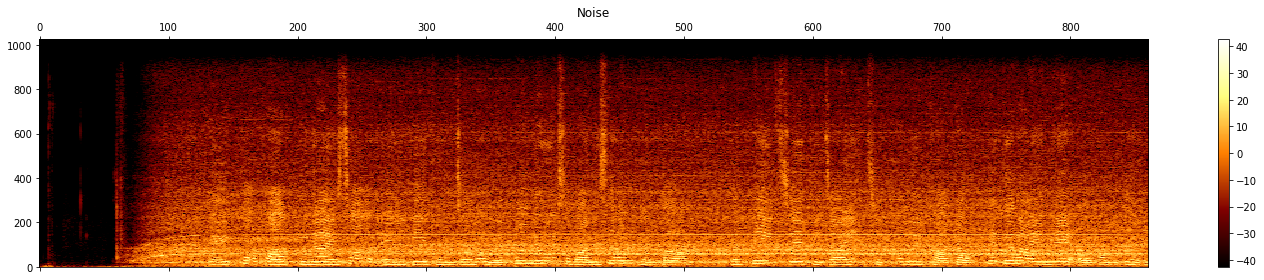

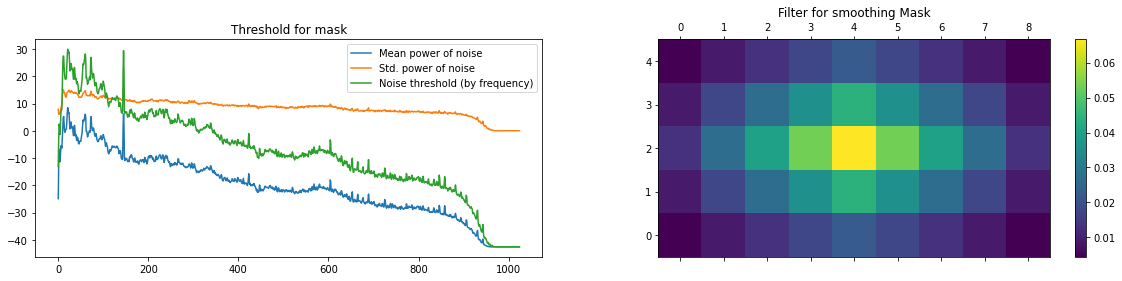

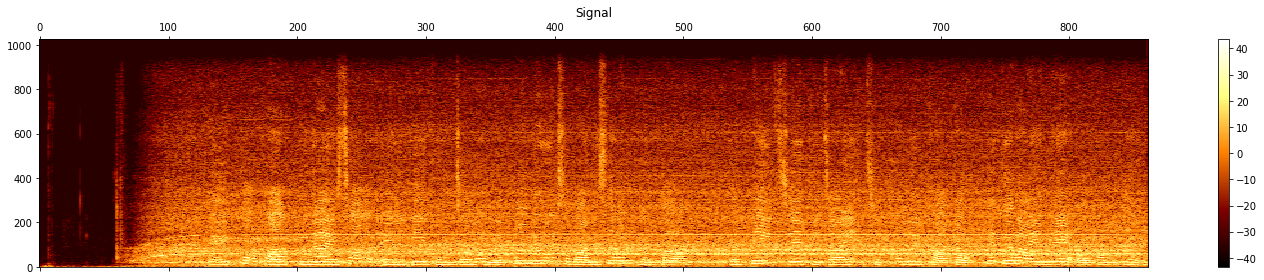

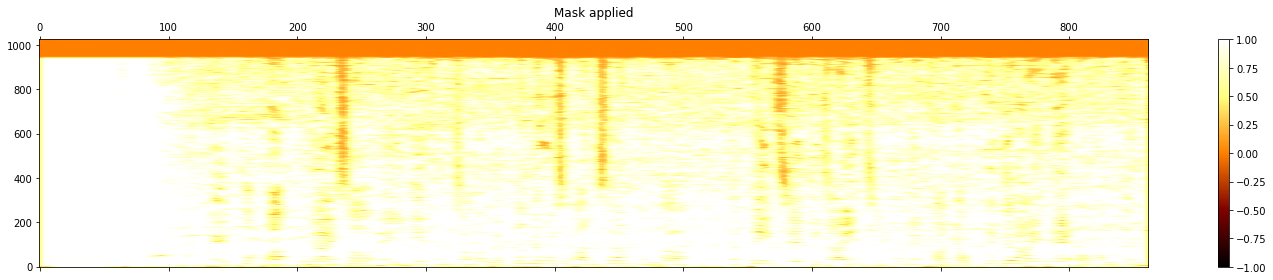

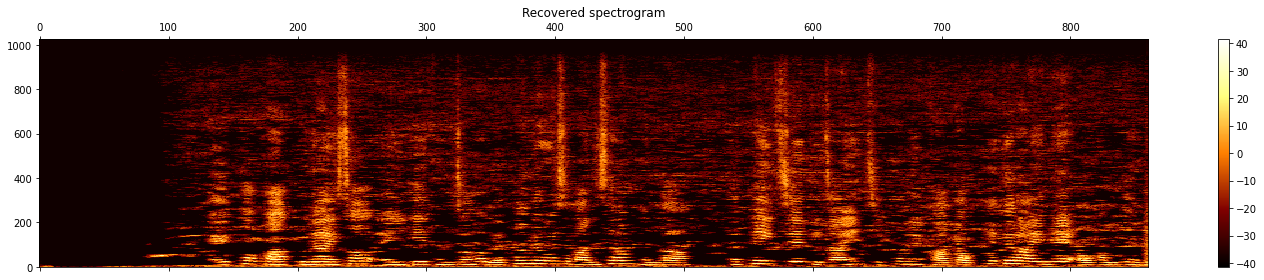

In [58]:
test_reduce_noise()

In [2]:
"""
Measure the frequencies coming in through the microphone
Mashup of wire_full.py from pyaudio tests and spectrum.py from Chaco examples
"""

import pyaudio
import numpy as np
import scipy.signal

CHUNK = 1024*2
FORMAT = pyaudio.paInt16
WIDTH = 2
DTYPE = np.int16
MAX_INT = 32768.0
WAVE_OUTPUT_FILENAME = "noisereduce.wav"
CHANNELS = 1
RATE = 11025*1
RECORD_SECONDS = 20

j = np.complex(0,1)


p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK)

print("* recording")

# initialize filter variables
fir = np.zeros(CHUNK * 2)
fir[:(2*CHUNK)] = 1.
fir /= fir.sum()

fir_last = fir
avg_freq_buffer = np.zeros(CHUNK)
obj = -np.inf
t = 10

# initialize sample buffer
buffer = np.zeros(CHUNK * 2)

#for i in np.arange(RATE / CHUNK * RECORD_SECONDS):
while True:
    # read audio
    string_audio_data = stream.read(CHUNK)
    audio_data = np.fromstring(string_audio_data, dtype=DTYPE)
    normalized_data = audio_data / MAX_INT
    freq_data = np.fft.fft(normalized_data)

    # synthesize audio
    buffer[CHUNK:] = np.random.randn(CHUNK)
    freq_buffer = np.fft.fft(buffer)
    freq_fir = np.fft.fft(fir)
    freq_synth = freq_fir * freq_buffer
    synth = np.real(np.fft.ifft(freq_synth))

    # adjust fir
    # objective is to make abs(freq_synth) as much like long-term average of freq_buffer
    MEMORY=100
    avg_freq_buffer = (avg_freq_buffer*MEMORY + \
                           np.abs(freq_data)) / (MEMORY+1)
    obj_last = obj

    obj = np.real(np.dot(avg_freq_buffer[1:51], np.abs(freq_synth[1:100:2])) / np.dot(freq_synth[1:100:2], np.conj(freq_synth[1:100:2])))
    if obj > obj_last:
        fir_last = fir
    fir = fir_last.copy()

    # adjust filter in frequency space
    freq_fir = np.fft.fft(fir)
    #t += np.clip(np.random.randint(3)-1, 0, 64)
    t = np.random.randint(100)
    
    freq_fir[t] += np.random.randn()*.05

    # transform frequency space filter to time space, click-free
    fir = np.real(np.fft.ifft(freq_fir))
    fir[:CHUNK] *= np.linspace(1., 0., CHUNK)**.1
    fir[CHUNK:] = 0


    # move chunk to start of buffer
    buffer[:CHUNK] = buffer[CHUNK:]
    
    # write audio
    audio_data = np.array(np.round_(synth[CHUNK:] * MAX_INT), dtype=DTYPE)
    string_audio_data = audio_data.tostring()
    stream.write(string_audio_data, CHUNK)

print("* done")

stream.stop_stream()
stream.close()

p.terminate()

# write data to WAVE file
data = ''.join(all)
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(data)
wf.close()

/Users/jaeyoungshin/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


* recording


/Users/jaeyoungshin/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/Users/jaeyoungshin/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/Users/jaeyoungshin/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:91: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


KeyboardInterrupt: 

In [3]:
import pyaudio
import wave
import audioop
from collections import deque
import os
import urllib
import time
import math
from scipy.io import wavfile
import IPython

# Microphone stream config.
CHUNK = 1024  # CHUNKS of bytes to read each time from mic
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
THRESHOLD = 2500  # The threshold intensity that defines silence
                  # and noise signal (an int. lower than THRESHOLD is silence).

SILENCE_LIMIT = 1  # Silence limit in seconds. The max ammount of seconds where
                   # only silence is recorded. When this time passes the
                   # recording finishes and the file is delivered.

PREV_AUDIO = 0.5  # Previous audio (in seconds) to prepend. When noise
                  # is detected, how much of previously recorded audio is
                  # prepended. This helps to prevent chopping the beggining
                  # of the phrase.
RECORD_SECONDS = 10

def audio_int(num_samples=50):
    """ Gets average audio intensity of your mic sound. You can use it to get
        average intensities while you're talking and/or silent. The average
        is the avg of the 20% largest intensities recorded.
    """

    print("Getting intensity values from mic.")
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    values = [math.sqrt(abs(audioop.avg(stream.read(CHUNK), 4))) 
              for x in range(num_samples)] 
    values = sorted(values, reverse=True)
    r = sum(values[:int(num_samples * 0.2)]) / int(num_samples * 0.2)
    print(" Finished ")
    print(" Average audio intensity is ", r)
    stream.close()
    p.terminate()
    return r


def listen_for_speech(threshold=THRESHOLD, num_phrases=-1):
    """
    Listens to Microphone, extracts phrases from it and sends it to 
    Google's TTS service and returns response. a "phrase" is sound 
    surrounded by silence (according to threshold). num_phrases controls
    how many phrases to process before finishing the listening process 
    (-1 for infinite). 
    """

    #Open stream
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* Listening mic. ")
    audio2send = []
    cur_data = ''  # current chunk  of audio data
    rel = RATE/CHUNK
    slid_win = deque(maxlen=round(SILENCE_LIMIT * rel))
    #Prepend audio from 0.5 seconds before noise was detected
    prev_audio = deque(maxlen=round(PREV_AUDIO * rel)) 
    started = False
    n = num_phrases
    response = []

    while (num_phrases == -1 or n > 0):
        for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
            cur_data = stream.read(CHUNK)
            slid_win.append(math.sqrt(abs(audioop.avg(cur_data, 4))))
            print(slid_win[-1])
            if(sum([x > THRESHOLD for x in slid_win]) > 0):
                if(not started):
                    print("Starting record of phrase")
                    started = True
                audio2send.append(cur_data)
            elif (started is True):
                print("Finished")
                # The limit was reached, finish capture and deliver.
     #           filename = save_speech(list(prev_audio) + audio2send, p)
                # Send file to Google and get response
                #r = stt_google_wav(filename) 
    #             if num_phrases == -1:
    #                 print("Response", r)
    #             else:
    #                 response.append(r)
                # Remove temp file. Comment line to review.
       #         os.remove(filename)
                # Reset all
                started = False
                slid_win = deque(maxlen=round(SILENCE_LIMIT * rel))
                prev_audio = deque(maxlen=round(0.5 * rel))
                audio2send = []
                n -= 1
                print("Listening ...")
            else:
                prev_audio.append(cur_data)

        print("* Done recording")
        stream.close()
        p.terminate()

    #    return response
        filename = 'output_'+str(int(time.time()))
        # writes data to WAV file
       # data = ''.join(data)
        wf = wave.open(filename + '.wav', 'wb')
        wf.setnchannels(1)
        wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
        wf.setframerate(RATE)  # TODO make this value a function parameter?
        wf.writeframes(b''.join(response))
        wf.close()
        return filename + '.wav'


# def save_speech(data, p):
#     """ Saves mic data to temporary WAV file. Returns filename of saved 
#         file """
#     filename = 'output_'+str(int(time.time()))
#     # writes data to WAV file
#     data = ''.join(data)
#     wf = wave.open(filename + '.wav', 'wb')
#     wf.setnchannels(1)
#     wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
#     wf.setframerate(16000)  # TODO make this value a function parameter?
#     wf.writeframes(data)
#     wf.close()
#     return filename + '.wav'

if(__name__ == '__main__'):
    listen_for_speech()  # listen to mic.
    #print stt_google_wav('hello.flac')  # translate audio file
    audio_int()  # To measure your mic levels
    rate, data = wavfile.read(listen_for_speech())
    #IPython.display.Audio(data=data, rate=rate)

* Listening mic. 
2692.017644815873
Starting record of phrase
1080.5123784575537
1126.617060051906
470.7122263124254
609.8975323773658
667.2255990292938
2209.3786456829894
1228.3159202745846
731.8203331419536
1282.8569678650852
966.9162321525066
1083.706140981032
909.687858553691
534.3903067983176
822.1015752326473
798.4040330559459
684.0862518717943
156.35536447464796
445.4256391363209
721.691762458184
842.0985690523408
896.5071109589705
1477.1330339546266
1726.7900856792062
260.2191384199095
1411.688350876354
1047.9770989864235
521.7844382501264
1292.9450877744189
1522.1993956114948
725.9359475876643
804.9515513370975
714.6530626814664
588.3162414892181
207.38852427268006
1241.428612526713
1692.083626774989
746.2827882244103
838.2147696145661
792.9344235181117
668.7600466535064
466.0697372711513
642.2001245717724
454.24442759377905
Finished
Listening ...
990.5877043452538
568.0598560011084
547.2878584437992
373.87029836562306
299.9733321480428
697.2445768881964
2434.3592586140608
167

690.6055313997999
228.53008554673934
556.679440971193
209.23192872981886
559.5462447376445
913.7592680788524
632.3598658991572
1147.500326797339
820.1518152147198
395.6576803247979
211.0544953323667
1547.2620980299362
666.5553240354471
1687.9564567843568
800.6453646902604
1014.0212029341399
720.7170041007774
722.6679735535538
969.9556690900879
367.48197234694385
1095.9210738004813
1010.4805787346929
608.0041118282014
528.245208213004
673.8115463540232
555.2999189627169
984.2357441182473
547.2896856327552
883.1279635477522
583.8407317068586
516.1114220786051
245.79666393179545
127.0
604.4145928086118
624.2107016064367
1058.9730874767308
1015.4718115240817
810.8927179349929
1016.3547608979849
185.55861607589122
2192.42559736927
1079.2071163590426
2106.52391393974
861.8549761995924
931.6555157352958
485.438976597471
508.8683523270041
667.418908932014
831.9302855408018
819.0586059617468
608.1110096026875
1160.4231986650389
778.6809359423152
740.7718947152356
818.9816847768941
752.176840909

In [66]:
!pip install requests

In [10]:
!brew uninstall portaudio
!brew install portaudio --HEAD

Uninstalling /usr/local/Cellar/portaudio/19.7.0... (33 files, 528.4KB)
Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
fabric-installer    lychee              revive              webhook
gnupg@2.2           macchina            seqkit
lefthook            mr2                 stp
==> Updated Formulae
Updated 388 formulae.
==> New Casks
arkiwi              flameshot           hook                optimus-player
chia                fpc-laz             isyncer             slidepilot
firefly             fpc-src-laz         menuwhere
==> Updated Casks
Updated 226 casks.
==> Deleted Casks
fpcsrc

==> Downloading https://ghcr.io/v2/homebrew/core/pkg-config/manifests/0.29.2_3
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/pkg-config/blobs/sha256:0040b6e
==> Downloading from https://pkg-containers-az.githubusercontent.com/ghcr1/blobs
##################

## 노이즈제거x 실시간 오디오파일 묵음기준 저장

In [ ]:
import pyaudio
import wave
import audioop
from collections import deque
import os
import urllib
import time
import math
import numpy as np
import noisereduce as nr
from scipy.io import wavfile


# Microphone stream config.
CHUNK = 1024  # CHUNKS of bytes to read each time from mic
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
THRESHOLD = 1000  # The threshold intensity that defines silence
                  # and noise signal (an int. lower than THRESHOLD is silence).

SILENCE_LIMIT = 0.5  # Silence limit in seconds. The max ammount of seconds where
                   # only silence is recorded. When this time passes the
                   # recording finishes and the file is delivered.

PREV_AUDIO = 0.2  # Previous audio (in seconds) to prepend. When noise
                  # is detected, how much of previously recorded audio is
                  # prepended. This helps to prevent chopping the beggining
                  # of the phrase.
RECORD_SECONDS = 10
snr = 2

def audio_int(num_samples=10):
    """ Gets average audio intensity of your mic sound. You can use it to get
        average intensities while you're talking and/or silent. The average
        is the avg of the 20% largest intensities recorded.
    """

    print("Getting intensity values from mic.")
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    values = [math.sqrt(abs(audioop.avg(stream.read(CHUNK), 4))) 
              for x in range(num_samples)] 
    values = sorted(values, reverse=True)
    r = sum(values[:int(num_samples * 0.2)]) / int(num_samples * 0.2)
    print(" Finished ")
    print(" Average audio intensity is ", r)
    stream.close()
    p.terminate()
    return r


def listen_for_speech(threshold=THRESHOLD, num_phrases=-1):
    """
    Listens to Microphone, extracts phrases from it and sends it to 
    Google's TTS service and returns response. a "phrase" is sound 
    surrounded by silence (according to threshold). num_phrases controls
    how many phrases to process before finishing the listening process 
    (-1 for infinite). 
    """

    #Open stream
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* Listening mic. ")
    audio2send = []
    cur_data = ''  # current chunk  of audio data
    rel = RATE/CHUNK
    slid_win = deque(maxlen=int(SILENCE_LIMIT * rel))
    #Prepend audio from 0.2 seconds before noise was detected
    prev_audio = deque(maxlen=int(PREV_AUDIO * rel))
    started = False
    n = num_phrases
    response = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        while (num_phrases == -1 or n > 0):
            cur_data = stream.read(CHUNK,exception_on_overflow=False)
            slid_win.append(math.sqrt(abs(audioop.avg(cur_data, 4))))
            if(sum([x > THRESHOLD for x in slid_win]) > 0):
                if(not started):
                    print("Starting record of phrase")
                    started = True
                audio2send.append(cur_data)
            elif (started is True):
                print("Finished")
                # The limit was reached, finish capture and deliver.
                filename = save_speech(list(prev_audio) + audio2send, p)
                started = False
                slid_win = deque(maxlen=int(SILENCE_LIMIT * rel))
                prev_audio = deque(maxlen=int(0.5 * rel)) 
                audio2send = []
                n -= 1
                print("Listening ...")
            else:
                prev_audio.append(cur_data)

    print("* Done recording")
    stream.close()
    p.terminate()

    return response


def save_speech(data, p):
    try:
        filename = 'original_output_'+str(int(time.strftime('%H%M%S')))
        # writes data to WAV file
        data = b''.join(data)
        wf = wave.open(filename + '.wav', 'wb')
        wf.setnchannels(1)
        wf.setsampwidth(p.get_sample_size(FORMAT))
        wf.setframerate(RATE)  # TODO make this value a function parameter?
        wf.writeframes(data)
        wf.close()
        return filename + '.wav'
    except data is None:
        print('Stop Recording')


if(__name__ == '__main__'):
    listen_for_speech()  # listen to mic.
    #print stt_google_wav('hello.flac')  # translate audio file
    audio_int()  # To measure your mic levels

* Listening mic. 
Starting record of phrase


## 실시간 녹음파일 노이즈리덕션o

In [1]:
import pyaudio
import wave
import audioop
from collections import deque
import os
import urllib
import time
import math
import numpy as np
import noisereduce as nr
from scipy.io import wavfile


# Microphone stream config.
CHUNK = 1024  # CHUNKS of bytes to read each time from mic
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
MIN_THRESHOLD = 1000  # The threshold intensity that defines silence
                  # and noise signal (an int. lower than THRESHOLD is silence).

MAX_THRESHOLD = 2500
    
SILENCE_LIMIT = 1  # Silence limit in seconds. The max ammount of seconds where
                   # only silence is recorded. When this time passes the
                   # recording finishes and the file is delivered.

PREV_AUDIO = 0.5  # Previous audio (in seconds) to prepend. When noise
                  # is detected, how much of previously recorded audio is
                  # prepended. This helps to prevent chopping the beggining
                  # of the phrase.
RECORD_SECONDS = 10
snr = 2

def audio_int(num_samples=50):
    """ Gets average audio intensity of your mic sound. You can use it to get
        average intensities while you're talking and/or silent. The average
        is the avg of the 20% largest intensities recorded.
    """

    print("Getting intensity values from mic.")
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    values = [math.sqrt(abs(audioop.avg(stream.read(CHUNK), 4))) 
              for x in range(num_samples)] 
    values = sorted(values, reverse=True)
    r = sum(values[:int(num_samples * 0.2)]) / int(num_samples * 0.2)
    print(" Finished ")
    print(" Average audio intensity is ", r)
    stream.close()
    p.terminate()
    return r


def listen_for_speech(threshold=MIN_THRESHOLD, num_phrases=-1):
    """
    Listens to Microphone, extracts phrases from it and sends it to 
    Google's TTS service and returns response. a "phrase" is sound 
    surrounded by silence (according to threshold). num_phrases controls
    how many phrases to process before finishing the listening process 
    (-1 for infinite). 
    """

    #Open stream
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* Listening mic. ")
    audio2send = []; noise2send = [0.0 for x in range(10)]
    cur_data = ''  # current chunk  of audio data
    rel = RATE/CHUNK
    slid_win = deque(maxlen=int(SILENCE_LIMIT * rel))
    #Prepend audio from 0.2 seconds before noise was detected
    prev_audio = deque(maxlen=int(PREV_AUDIO * rel))
    started = False
    n = num_phrases
    response = []

    while (num_phrases == -1 or n > 0):
        #for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        cur_data = stream.read(CHUNK,exception_on_overflow=False)
        #######
#         data = stream.read(CHUNK,exception_on_overflow=False)
#         cur_data = np.nan_to_num(np.frombuffer(data, dtype=np.float32))
#         noise_sample = cur_data[:]/snr
#         cur_data = nr.reduce_noise(audio_clip=cur_data, noise_clip=noise_sample, verbose=False).tobytes()
#         #######
        slid_win.append(math.sqrt(abs(audioop.avg(cur_data, 4))))
        if(sum([x > MIN_THRESHOLD for x in slid_win]) > 0):
            if(not started):
                print("Starting record of phrase")
                started = True
            audio2send.append(cur_data)
        ########
            if (sum([(x > 2000 and x < 2500) for x in slid_win]) > 0):
                for i in range(len(noise2send)):
                    noise2send[i] = cur_data
        ########
        elif (started is True):
            print("Finished")
            # The limit was reached, finish capture and deliver.
            filename = save_speech(list(prev_audio) + audio2send, p, noise2send)
            started = False
            slid_win = deque(maxlen=int(SILENCE_LIMIT * rel))
            prev_audio = deque(maxlen=int(0.5 * rel)) 
            audio2send = []
            n -= 1
            print("Listening ...")
        else:
            prev_audio.append(cur_data)

    print("* Done recording")
    stream.close()
    p.terminate()

    return response


def save_speech(data, p, noise2send):
    """ Saves mic data to temporary WAV file. Returns filename of saved 
        file """
    #try:
    filename = 'nr_output_'+str(int(time.strftime('%H%M%S')))
    # writes data to WAV file
    data = b''.join(data)
    wf = wave.open(filename + '.wav', 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)  # TODO make this value a function parameter?
    wf.writeframes(data)
    wf.close()
    #########
    rate, data = wavfile.read(filename + '.wav')
    data = data.astype('float32')
  #  noise_data = data[:]
    #########
    print(noise2send)
    #noise_data = np.array(noise2send[:1000],dtype='float32')
    #noise_data = np.frombuffer(np.array(noise2send).tobytes(), dtype=np.float32)
    print(noise_data)

    #########
    snr = 2  # signal to noise ratio
    noise_clip = noise_data / snr
    reduced_noise = nr.reduce_noise(
        audio_clip=data, noise_clip=noise_clip, verbose=False)
    wavfile.write(filename +'.wav', rate=RATE, data=reduced_noise.astype(np.int16))
    #########
    return filename + '.wav'
#     except data is None:
#         print('Stop Recording')


if(__name__ == '__main__'):
    listen_for_speech()  # listen to mic.
    #print stt_google_wav('hello.flac')  # translate audio file
    audio_int()  # To measure your mic levels

/Users/jaeyoungshin/opt/anaconda3/envs/python3.7/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


* Listening mic. 
Starting record of phrase


KeyboardInterrupt: 

In [ ]:
!python --version

In [8]:
sum([12,34])

46